### LAM-dataset retrieval pipeline: 
- a query-generator script that uses GPT-4o-mini to craft one Italian question per page (saving both lam_queries.jsonl and lam_qrels.tsv), 
- LAMQueryDataset/load_qrels loader for PyTorch batching or plain dict access,
- a use_LAM_Q.ipynb notebook that demonstrates loading the files, printing sample metadata, visualising the page image with its generated query, and confirming the qrels structure

### LAM loader

Image tensor shape: torch.Size([3, 1620, 1200])
Answer sentance used to generate the query: Avrebbe mai V.E. fatti bene i conti del
Query generated for the image: Quali conti avrebbe fatto bene V.E.?
Image location: data/LAM/full_pages/024/img/024_924.jpg
Image doc ID: 024_924
______________________________

qrels sample 0:
 query_id	doc_id	relevance 
 ('LAM-000000', {'024_924': 1})

qrels sample 1:
 query_id	doc_id	relevance 
 ('LAM-000001', {'024_925': 1})


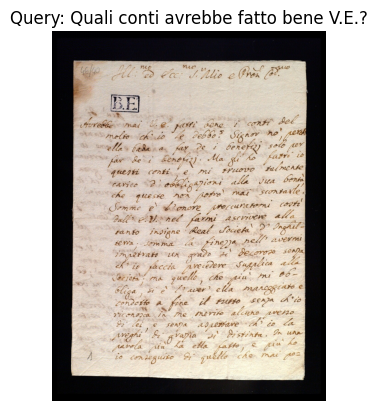

In [ ]:
import csv
from torchvision import transforms
import matplotlib.pyplot as plt
from torchvision.transforms import ToPILImage
from datasets import LAMQueryDataset

def load_qrels(qrels_tsv):
    """Return dict: query_id -> {doc_id: relevance}."""
    qrels = {}
    with open(qrels_tsv, encoding="utf-8") as f:
        reader = csv.reader(f, delimiter="\t")
        next(reader)  # skip header
        for qid, doc_id, rel in reader:
            qrels.setdefault(qid, {})[doc_id] = int(rel)
    return qrels

QUERIES = "data/queries/lam_queries.jsonl"
QRELS   = "data/queries/lam_qrels.tsv" # query_id	doc_id	relevance

tf = transforms.Compose([
    # transforms.Resize((224, 224)),
    transforms.ToTensor()
])
data_img = LAMQueryDataset(QUERIES, load_images=True, transform=tf)
print("Image tensor shape:", data_img[0]["image"].shape)
print("Answer sentance used to generate the query:", data_img[0]["answer"])
print("Query generated for the image:", data_img[0]["query"])
print("Image location:", data_img[0]["image_path"])
print("Image doc ID:", data_img[0]["doc_id"])
print("___"*10)

# 3. load qrels for evaluation
qrels = load_qrels(QRELS)
print("\nqrels sample 0:\n query_id	doc_id	relevance \n", list(qrels.items())[0])
print("\nqrels sample 1:\n query_id	doc_id	relevance \n", list(qrels.items())[1])

# 4. visualize the image 
sample = data_img[0]
# img_tensor = sample["image"]
# query      = sample["query"]


img_pil = ToPILImage()(sample["image"].cpu())
plt.imshow(img_pil)
plt.axis("off")
plt.title("Query: "+ sample["query"], wrap=True)
plt.show()